### TODO
1. create state heatmap for number of cases [IMP]
3. correlation analysis and gather related graphs to add
2. why and what ML algo used for case prediction 



<h1>a) Check out this page: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Ohio. In around 250
words, summarize the Covid-19 experience of Ohio. </h1>

<h2>(i)Specifically, focus on how Ohio is different or similar to other US states in terms of the intensity of the pandemic</h2>

<p>Similar to many other US states, Ohio has experienced peaks and valleys in the number of cases.
Although California and New York, two states with higher populations, have been impacted harder than other states, Ohio has nonetheless reported a sizable number of cases and fatalities.
Around 23,000 deaths as of April 2023. </p>

<h2>(ii)the time and the content of the different policies that have been implemented</h2>

<p>The epidemic has been marked by a variety of policies that have been put into place at various points. Governor Mike DeWine proclaimed a state of emergency in March 2020 and shut down businesses like pubs, restaurants, and schools. The state also issued a directive to remain at home. Ohio started to reopen as instances decreased in the summer of 2020, but mask restrictions were still in effect. Ohio reinstated several limitations in the fall, like banning sizable gatherings. These regulations have included requirements for masks, company and event capacity caps, and vaccination requirements for specific populations, such as healthcare professionals. Ohio has also tried to make testing and immunizations more accessible, and it has given money to people and organizations that have been impacted financially by the pandemic.</p>

<h2>(iii) if Wikipedia ‘thinks’ Ohio has dealt with Covid-19 successfully (or not)</h2>

<p> Wikipedia's page on the COVID-19 pandemic in Ohio does not explicitly state whether the state has dealt with the pandemic successfully. However, it does note that Ohio's case numbers have fluctuated throughout the pandemic.</p>

<h1>b) Find the average values for all the topic awareness variables.</h1>

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
# create a sample dataframe
data = pd.read_csv("./training_data.csv")
df = pd.DataFrame(data)

In [19]:
# df = df.sort_values('date_index_converted')
df.head()

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.00000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.00000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.00037,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.00000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.00000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724


In [20]:
# df.shape
all_columns = list(df.columns)

In [21]:
#topic awareness variables
str_col = "core_cosine, core_cosine_normalized, core_intersection, core_intersection_normalized, core_jaccard, core_jaccard_normalized, domestic_cosine, domestic_cosine_normalized, domestic_intersection, domestic_intersection_normalized, domestic_jaccard, domestic_jaccard_normalized, economy_cosine, economy_cosine_normalized, economy_intersection, economy_intersection_normalized, economy_jaccard, economy_jaccard_normalized, education_cosine, education_cosine_normalized, education_intersection, education_intersection_normalized, education_jaccard, education_jaccard_normalized, entertainment_cosine, entertainment_cosine_normalized, entertainment_intersection, entertainment_intersection_normalized, entertainment_jaccard, entertainment_jaccard_normalized, foreign_cosine, foreign_cosine_normalized, foreign_intersection, foreign_intersection_normalized, foreign_jaccard, foreign_jaccard_normalized, gender_cosine, gender_cosine_normalized, gender_intersection, gender_intersection_normalized, gender_jaccard, gender_jaccard_normalized, health_cosine, health_cosine_normalized, health_intersection, health_intersection_normalized, health_jaccard, health_jaccard_normalized, health_technology_cosine, health_technology_cosine_normalized, health_technology_intersection, health_technology_intersection_normalized, health_technology_jaccard, health_technology_jaccard_normalized, ideology_cosine, ideology_cosine_normalized, ideology_intersection, ideology_intersection_normalized, ideology_jaccard, ideology_jaccard_normalized, illness_cosine, illness_cosine_normalized, illness_intersection, illness_intersection_normalized, illness_jaccard, illness_jaccard_normalized, labor_force_rate, median_household_earnings, median_housing_cost, median_property_value, nationalistic_cosine, nationalistic_cosine_normalized, nationalistic_intersection, nationalistic_intersection_normalized, nationalistic_jaccard, nationalistic_jaccard_normalized, percent_25_34, percent_highschool, percent_insure, percent_married, percent_white, politics_cosine, politics_cosine_normalized, politics_democratic_hate_cosine, politics_democratic_hate_cosine_normalized, politics_democratic_hate_intersection, politics_democratic_hate_intersection_normalized, politics_democratic_hate_jaccard, politics_democratic_hate_jaccard_normalized, politics_democratic_love_cosine, politics_democratic_love_cosine_normalized, politics_democratic_love_intersection, politics_democratic_love_intersection_normalized, politics_democratic_love_jaccard, politics_democratic_love_jaccard_normalized, politics_intersection, politics_intersection_normalized, politics_jaccard, politics_jaccard_normalized, politics_republican_hate_cosine, politics_republican_hate_cosine_normalized, politics_republican_hate_intersection, politics_republican_hate_intersection_normalized, politics_republican_hate_jaccard, politics_republican_hate_jaccard_normalized, politics_republican_love_cosine, politics_republican_love_cosine_normalized, politics_republican_love_intersection, politics_republican_love_intersection_normalized, politics_republican_love_jaccard, politics_republican_love_jaccard_normalized, poverty_rate, race_cosine, race_cosine_normalized, race_intersection, race_intersection_normalized, race_jaccard, race_jaccard_normalized, religion_cosine, religion_cosine_normalized, religion_intersection, religion_intersection_normalized, religion_jaccard, religion_jaccard_normalized, social_cosine, social_cosine_normalized, social_intersection, social_intersection_normalized, social_jaccard, social_jaccard_normalized, sports_cosine, sports_cosine_normalized, sports_intersection, sports_intersection_normalized, sports_jaccard, sports_jaccard_normalized"
awr_col = [s for s in str_col.split(", ")]
len(awr_col)

def average_of(col_name):
    try:
        avg_val = None
        avg_val = sum(df[col_name])/ 3141        
    except KeyError:
        print(f"Error: {col_name} Key not found.")
    finally:
        return avg_val

for col_name in awr_col:
    if col_name in all_columns:
        avg_val = average_of(col_name)
        print(f'Avg of {col_name}: {avg_val}')

Avg of core_cosine: 0.00018789101177968805
Avg of core_cosine_normalized: 0.010268319925501427
Avg of core_intersection: 0.0026522748086596623
Avg of core_intersection_normalized: 0.013261374043298324
Avg of core_jaccard: 3.050870391595029e-05
Avg of core_jaccard_normalized: 0.013086534762496016
Avg of domestic_cosine: 0.00021837453231454953
Avg of domestic_cosine_normalized: 0.0033333425787965554
Avg of domestic_intersection: 0.005132516515759312
Avg of domestic_intersection_normalized: 0.002566258361668257
Avg of domestic_jaccard: 2.179694141992992e-05
Avg of domestic_jaccard_normalized: 0.0025611406513849078
Avg of economy_cosine: 0.00017424482012098083
Avg of economy_cosine_normalized: 0.004083613994587713
Avg of economy_intersection: 0.00281600406558421
Avg of economy_intersection_normalized: 0.0057661035644699194
Avg of economy_jaccard: 2.115713371537725e-05
Avg of economy_jaccard_normalized: 0.005675149621776498
Avg of education_cosine: 0.00016495430372492827
Avg of education_co

<h2> b) Create a bar chart that shows the average normalized Jaccard similarity-based awareness values for all different types of awareness topics listed above. Order the bars from the biggest to the smallest. Summarize your observations in around 100 words. [4 points] </h2>

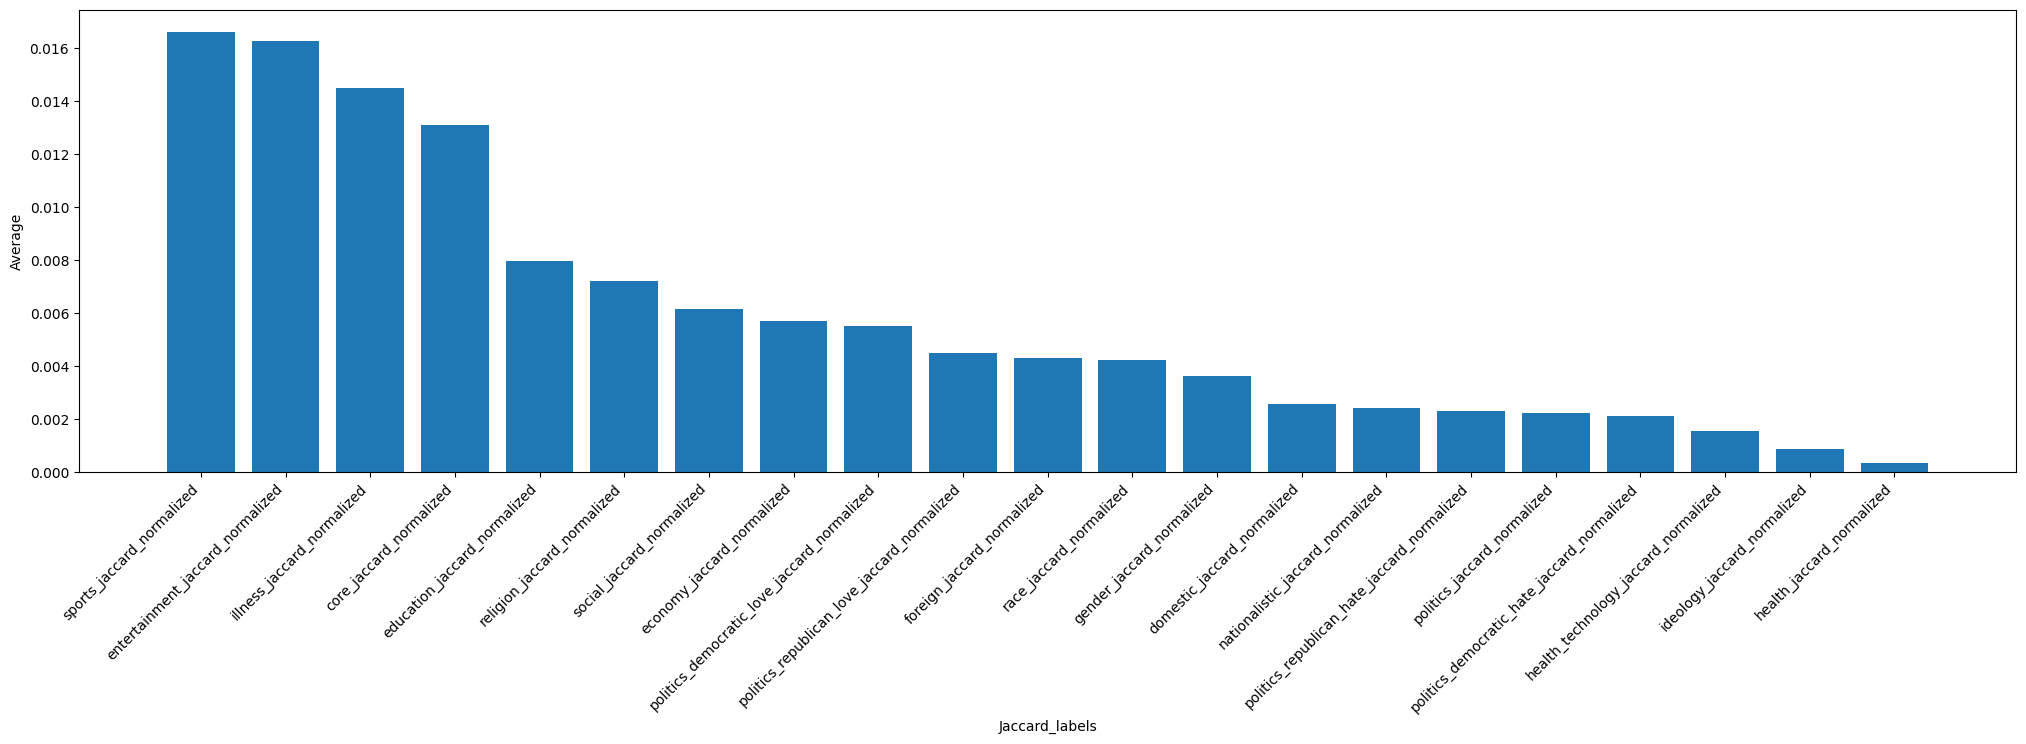

In [55]:
avg_df = {}
jacc_norm_cols = []

for col_name in all_columns:
    if "jaccard_normalized" in col_name:
        jacc_norm_cols.append(col_name)
        avg_val = df[col_name].mean()
        avg_df[col_name] = avg_val

sorted_data = sorted(avg_df.items(), key=lambda x: x[1], reverse=True)

# Extract keys and values from sorted dictionary
keys = [x[0] for x in sorted_data]
values = [x[1] for x in sorted_data]

plt.subplots(figsize=(25, 6))

plt.bar(keys, values)
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Jaccard_labels')
plt.ylabel('Average')

# Show the plot
plt.show()

<h2>Summarize your observations in around 100 words. [4 points]</h2>
<p>From the bar graph we can see that sports, entertainment, illness and covid-19(core) imply that these are closely related topics and may be part of the same broader category or theme. Additionally, these topics are more frequent in the population than other topics Similarly we can see the that religion, social, education have similar normalized value implying that these are equally frequent in the dataset. On the other hand we see that the political topics have equally alike differences in awareness and share very little in common for overall population.  </p>

<h2> c) Focus on the core_jaccard_normalized variable. Create a bar chart that shows the
aggregated mean awareness value for each county. Order the bars from the biggest to the
smallest. Which county has the highest awareness? </h2>

In [23]:
df_core = df.loc[:, ['core_jaccard_normalized', 'county']].copy()

df_core = df_core.groupby('county').mean()
df_core.head()

,core_jaccard_normalized
county,
Adams,0.008313
Allen,0.011235
Ashland,0.005751
Ashtabula,0.007591
Athens,0.027168


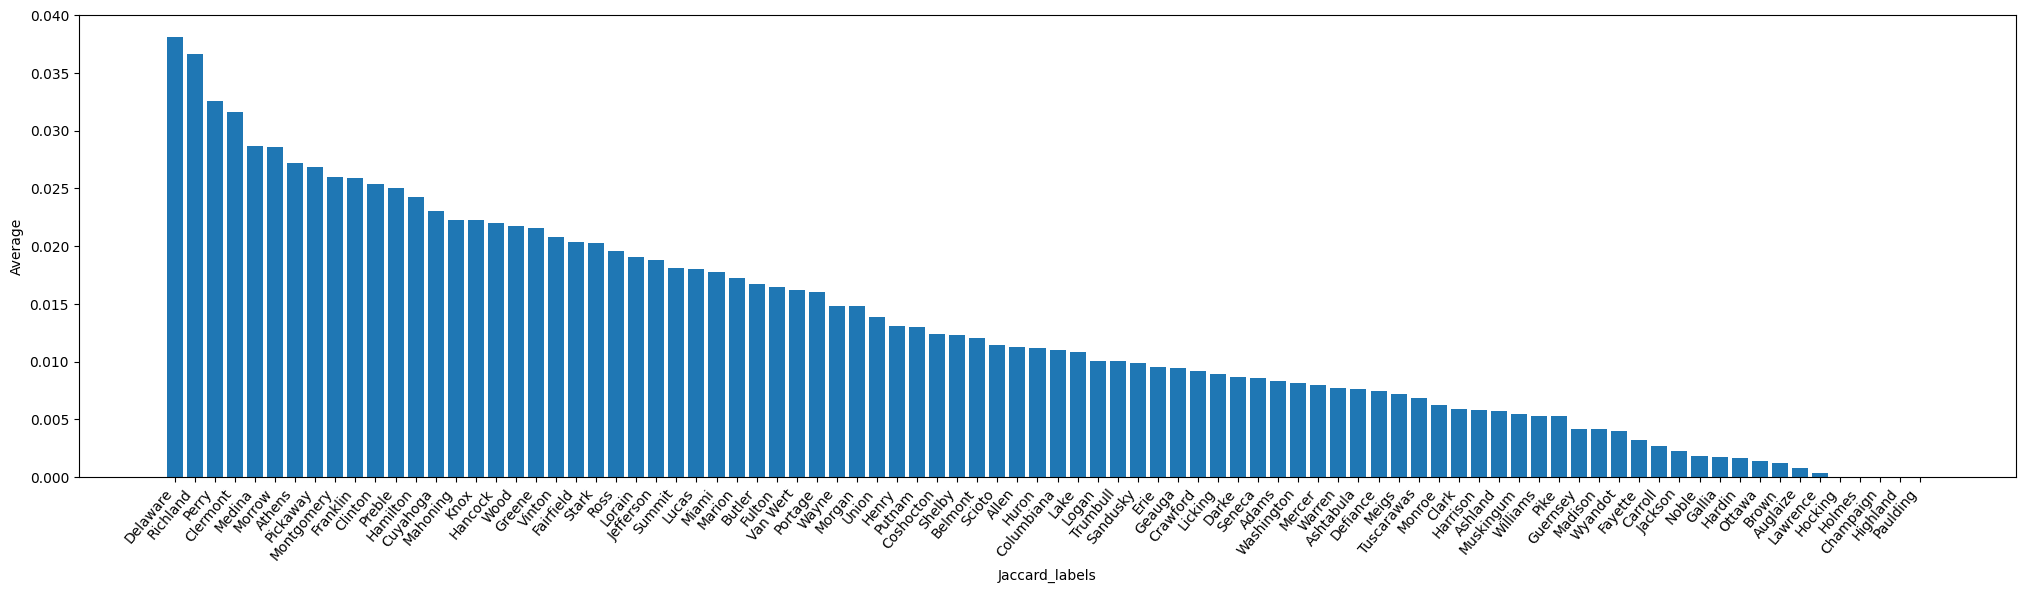

In [24]:
df_sorted = df_core.sort_values('core_jaccard_normalized', ascending=False)

plt.subplots(figsize=(25, 6))

plt.bar(df_sorted.index, df_sorted['core_jaccard_normalized'])
plt.xticks(rotation=50, ha='right')

# Add labels and title
plt.xlabel('Jaccard_labels')
plt.ylabel('Average')
# Show the plot
plt.show()

<h2>Summarize your observations in around 100 words. [4 points] </h2>
<p>Counties with highest average jaccard normalized value for covid-19 topics awareness indicates high topic visibility and frequency in those counties. For instance, Delaware, Richland, Perry, Chermount display a well above average awareness score. although the value seems to gradually lower for remaining counties showing a almost similar trend about the covid-19 topic. However, there are counties like Hocking, Holmes, Champaign, Paulding that have almost zero average jaccard value for covid19 implying almost no awareness in the first few months of 2019.</p>

<h2>d) Create two county-level maps of Ohio. Using colors, show the number of average Covid-19 cases per capita and the number of average Covid-19 deaths per capita by county. What are the top-5 counties with high number of per capita cases and per capita number of deaths? Summarize your observations in around 100 words. [4 points]</h2>

<h2> Summarize your observations in around 100 words. [4 points]</h2>

<h2> Calculate the average normalized Jaccard awareness scores for every day (starting from Day 1).
Create a line chart with overlapping lines in which each line represents the evolution of awareness
levels for each topic.4 The x-axis of the line chart should correspond to ‘Days’, and the y-axis of
the line chart should represent the level of awareness. What are the trends in the graph?
Summarize your observations in around 100 words. [4 points] </h2>

In [56]:
def get_day(name):
    return int(name.split("_")[1])

# Apply the function to the 'Name' column and store the result in a new column
df['day'] = df['date_index_converted'].apply(get_day)

df = df.sort_values('day')
# Display the DataFrame
print(df.head())

       county  cases  deaths date_index_converted  county_data_length  \
336      Lake      0       0                day_1                 843   
2157    Union      0       0                day_1                 181   
2313  Ashland      0       0                day_1                 119   
347    Monroe      0       0                day_1                  98   
1893   Warren      0       0                day_1                 635   

      core_jaccard  core_cosine  core_intersection  social_jaccard  \
336            0.0          0.0                0.0        0.000005   
2157           0.0          0.0                0.0        0.000023   
2313           0.0          0.0                0.0        0.000072   
347            0.0          0.0                0.0        0.000087   
1893           0.0          0.0                0.0        0.000007   

      politics_jaccard  ...  median_housing_cost  median_household_earnings  \
336           0.000000  ...                  935             

In [57]:
# all_cols = all_jaccard_cols
# all_cols.append('date_index_converted')
df_day = df.loc[:, jacc_norm_cols].copy()
df_day['day'] = df.loc[:, 'day'].copy()
df_day.head()

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,day
336,0.0,0.0,0.0,0.021781,0.058665,0.0,0.001174,0.0,0.010261,0.0,...,0.005436,0.001182,0.004981,0.000000,0.0,0.00797,0.0,0.0,0.0,1
2157,0.0,0.0,0.0,0.000000,0.021860,0.0,0.000000,0.0,0.000000,0.0,...,0.025378,0.005499,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,1
2313,0.0,0.0,0.0,0.017194,0.033267,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.016803,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,1
347,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.345469,0.0,...,0.000000,0.020398,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,1
1893,0.0,0.0,0.0,0.003219,0.012457,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.001574,0.000000,0.004372,0.0,0.00000,0.0,0.0,0.0,1


In [58]:
# df['sum_jaccard'] = df[all_jaccard_cols].sum(axis=1)
# df_day = df.loc[:, ['day', 'sum_jaccard']].copy()
df_day = df_day.groupby('day').mean()
df_day.head()

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized
day,,,,,,,,,,,,,,,,,,,,,
1,0.000007,0.000208,0.000000,0.006211,0.010840,0.000426,0.002583,0.004060,0.016869,0.001186,...,0.000573,0.007803,0.003742,0.004655,0.000438,0.005994,0.000333,0.000041,0.000000,0.000663
2,0.000000,0.000000,0.000000,0.006109,0.014642,0.000000,0.001323,0.000000,0.003711,0.000116,...,0.000000,0.006526,0.003498,0.000646,0.002933,0.012516,0.000080,0.000000,0.000000,0.000000
3,0.000006,0.000000,0.000030,0.006696,0.016295,0.005015,0.001789,0.005286,0.002438,0.001653,...,0.000860,0.002727,0.004590,0.004534,0.000381,0.014457,0.000733,0.004536,0.000000,0.002176
4,0.000008,0.000031,0.000000,0.005475,0.038437,0.005502,0.002235,0.000223,0.005051,0.000539,...,0.000865,0.006316,0.004976,0.003193,0.000679,0.023473,0.000257,0.000014,0.000000,0.000025
5,0.000000,0.000000,0.000721,0.002926,0.037963,0.011382,0.001961,0.005896,0.007442,0.000817,...,0.000131,0.017044,0.004403,0.004977,0.001508,0.008791,0.001804,0.006810,0.001768,0.000036


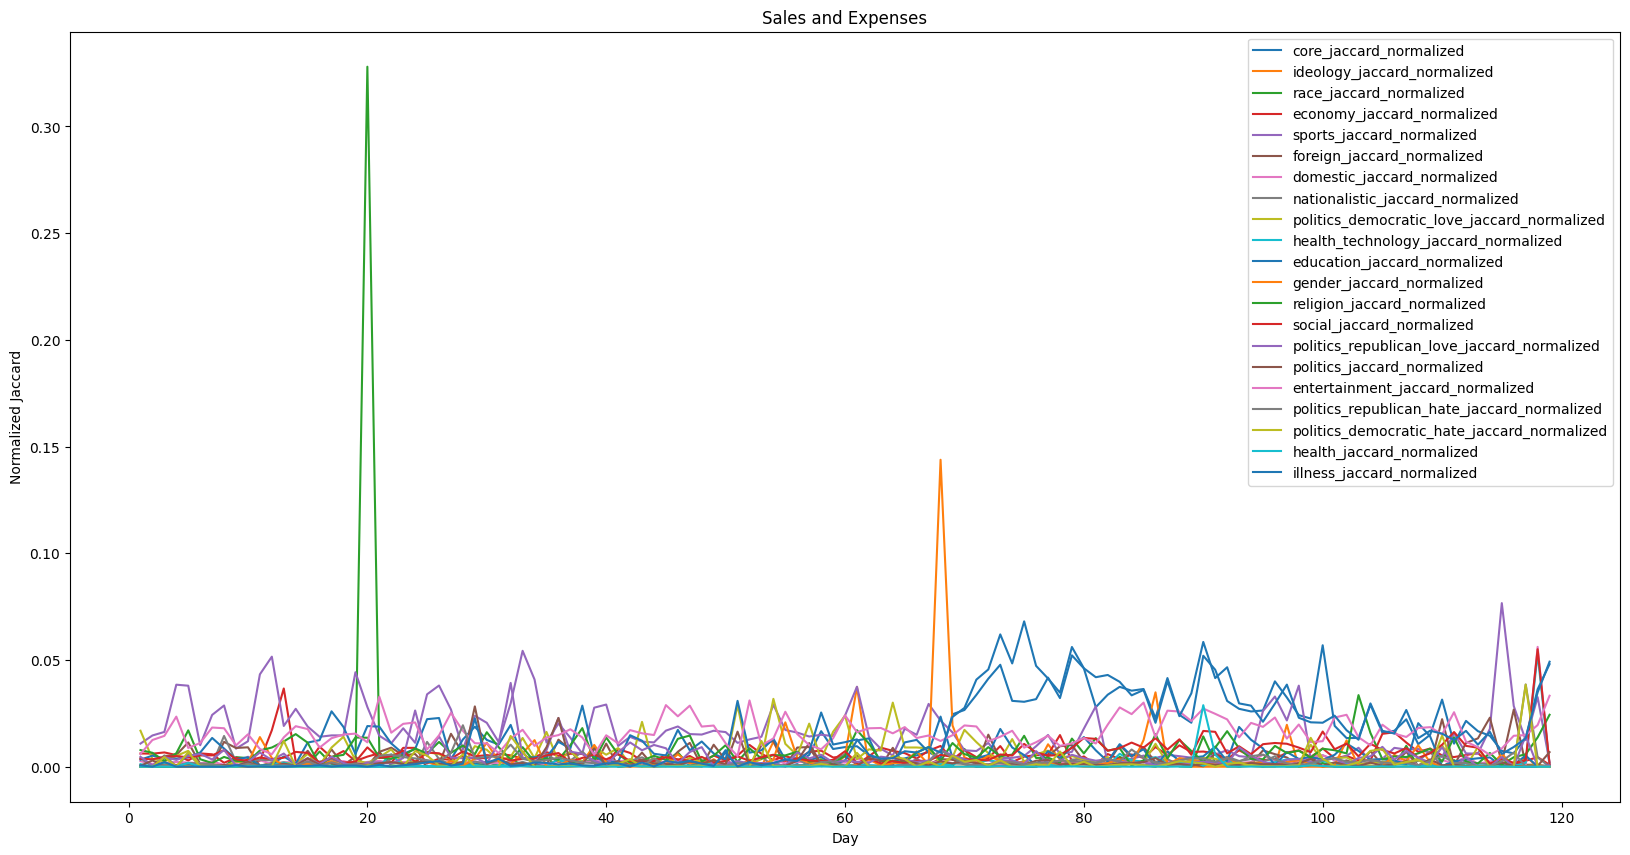

In [61]:
plt.subplots(figsize=(20, 10))
# Create a line graph of the 'Sales' and 'Expenses' columns
plt.plot(df_day.index, df_day, label=df_day.columns)
# Create a line plot for each column in the DataFrame
# for col in df_day.columns:
#     plt.plot(df.index, df_day[col], label=col)
# plt.plot(df['Year'], df['Expenses'], label='Expenses')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Normalized Jaccard')
plt.title('Sales and Expenses')

plt.legend()

# Show the plot
plt.show()


<h2>Summarize your observations in around 100 words. [4 points] </h2>
<p>From the line graph we can see that, covid awareness started spiking by the end, after 60-70 day mark from the beginning of 2019. Spikes in topics like race  can indicate two noted incidents of targetted hate towards china (first case of covid-19) and later in idealogy we see spike that might coincide with using constitutional rights to challenge pandamic mandates and laws. Along with covid, topic awareness about illness is seen in similar trend in the graph after 70 day mark. This indicates close frequency usage of covid and illness by aggregate counties. </p>